# Assignment 3: Methods and Plan

In [1]:
library(tidyverse)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Question of Interest
Part One:
> Do the company's advertisements generate a meaningful increase in purchase conversion rates when compared to those not exposed to the advertisements?

Part Two:
> In a simulated longitudinal study, how does the implementation of various p-value adjustment methods (such as Pocock and Bonferroni) affect the interpretation of A/B testing results over time, specifically in assessing the effectiveness of the company's advertisements on purchase conversion rates?

## Exploratory Data Analysis

This dataset is for a marketing company to analyze the impact of advertising campaigns. It captures the details of individuals exposed to either a specific advertisement or a public service announcement. The dataset provides insights into whether the campaign led to a conversion, the number of ads seen by the individual, and details about the most active day and hour.

In [26]:
# data placed in a GitHub repository
url = "https://raw.githubusercontent.com/ZiyueChloeZhang/A-B-Testing/main/data/marketing_AB.csv"

# read data
marketing <- read.csv(url)

str(marketing)

'data.frame':	588101 obs. of  7 variables:
 $ X            : int  0 1 2 3 4 5 6 7 8 9 ...
 $ user.id      : int  1069124 1119715 1144181 1435133 1015700 1137664 1116205 1496843 1448851 1446284 ...
 $ test.group   : chr  "ad" "ad" "ad" "ad" ...
 $ converted    : chr  "False" "False" "False" "False" ...
 $ total.ads    : int  130 93 21 355 276 734 264 17 21 142 ...
 $ most.ads.day : chr  "Monday" "Tuesday" "Tuesday" "Tuesday" ...
 $ most.ads.hour: int  20 22 18 10 14 10 13 18 19 14 ...


Filter out irrelavent columns. Keep `test.group` and `converted`. Convert `converted` and 
`test.group` from `chr` to `lgl` and `fct`.

In [27]:
marketing <- marketing %>% 
    select(test.group, converted) %>%
    mutate(
        converted = as.logical(converted),
        test.group = as.factor(test.group)
    )
str(marketing)
summary(marketing)

'data.frame':	588101 obs. of  2 variables:
 $ test.group: Factor w/ 2 levels "ad","psa": 1 1 1 1 1 1 1 1 1 1 ...
 $ converted : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


 test.group   converted      
 ad :564577   Mode :logical  
 psa: 23524   FALSE:573258   
              TRUE :14843    

In [28]:
# Conversion rates by group
conversion_rates_by_group <- marketing %>%
  group_by(test.group) %>%
  summarize(ConversionRate = mean(converted == "TRUE"))
conversion_rates_by_group

test.group,ConversionRate
<fct>,<dbl>
ad,0.02554656
psa,0.01785411


### Visualization

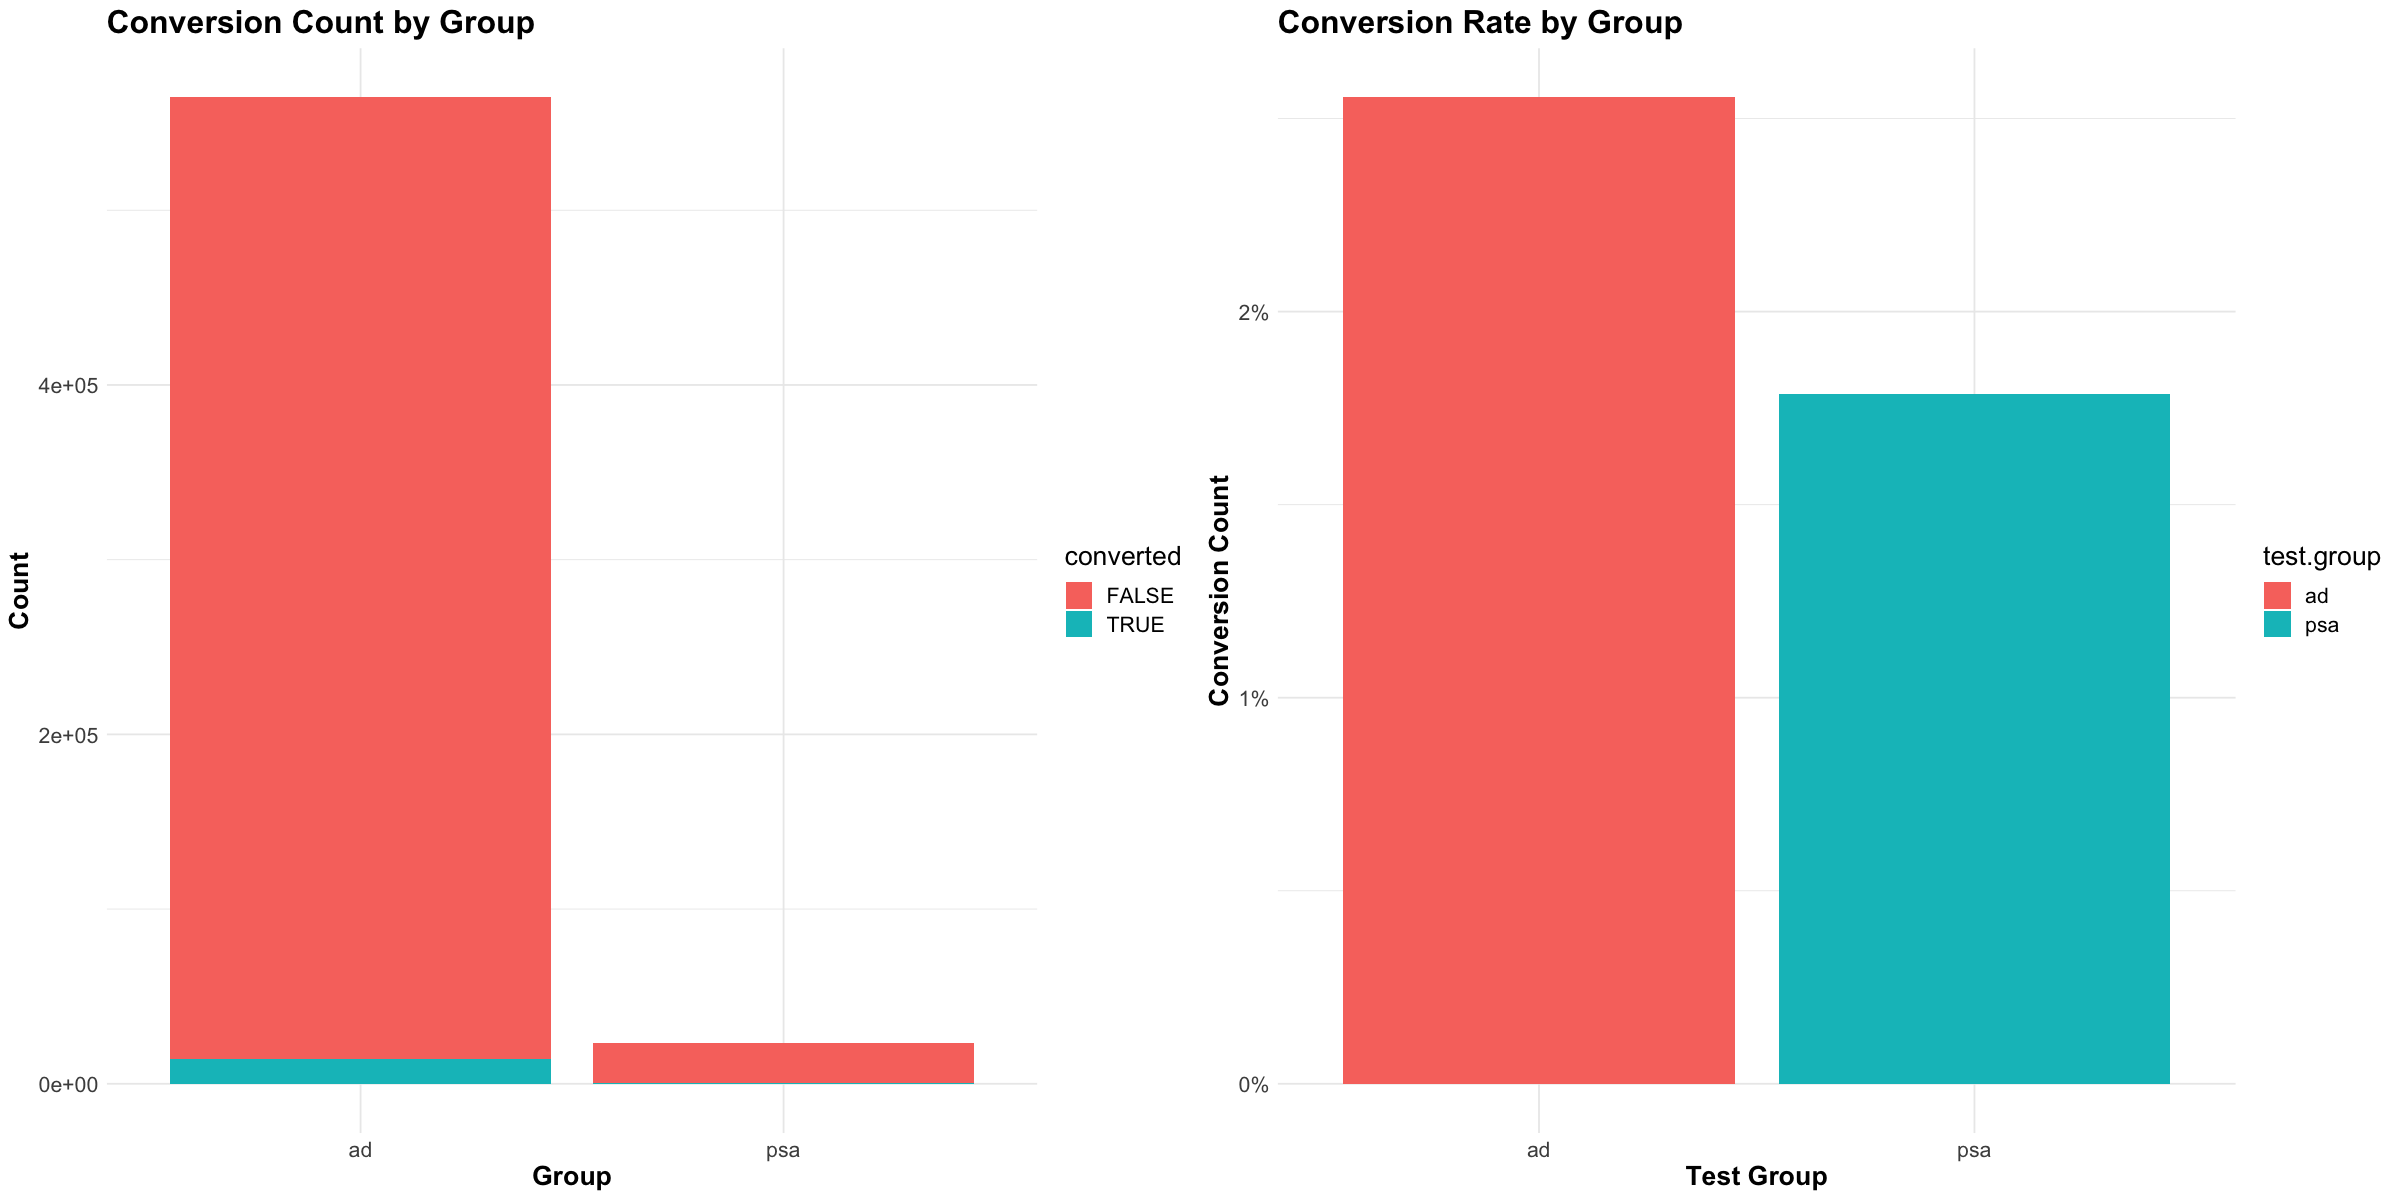

In [60]:
theme = theme_minimal() + theme(
    text = element_text(size = 16),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
)

conversion_count_by_group_bar <- ggplot(marketing, aes(x=test.group, fill=converted)) +
  geom_bar()+
  ggtitle("Conversion Count by Group") +
  xlab("Group") +
  ylab("Count") +
  theme

conversion_rates_by_group_bar = ggplot(conversion_rates_by_group, aes(x=test.group, y=ConversionRate, fill=test.group)) +
  geom_bar(stat="identity") +
  ggtitle("Conversion Rate by Group") +
  xlab("Test Group") +
  ylab("Conversion Count")+
  scale_y_continuous(labels = scales::percent) +
  theme

options(repr.plot.width=20, repr.plot.height=10)

grid.arrange(
    conversion_count_by_group_bar,
    conversion_rates_by_group_bar, 
    nrow = 1,
    widths = c(1, 1)
)

**Conversion Count by Group**: This bar chart shows the raw count of conversions for each group—those who have seen the advertisements ('ad') and those who have not been exposed to them ('psa'). The counts are further subdivided into 'TRUE' (converted) and 'FALSE' (not converted), indicated by different colors. This chart helps understand the absolute number of conversions and non-conversions in each group.

**Conversion Rate by Group**: This plot directly addresses the core question by comparing the average conversion rates between the groups exposed to advertisements ('ad') and the public service announcements ('psa'). A clear visual comparison can be made through the heights of the bars. The 'ad' group's bar is significantly higher, suggesting that advertisements may indeed be effective at increasing conversions.

## Assignment 3: Methods and Plan

### Part One: Simple Inference Analysis
**Question**:
> Do the company's advertisements generate a meaningful increase in purchase conversion rates when compared to those not exposed to the advertisements?


**Null Hypothesis**: There is no difference in purchase conversion rates between the group exposed to the company's advertisements and the group not exposed to the advertisements.

$$H_0: \mu_{ad} = \mu_{psa}$$

#### Method: Welch's T-test

The Welch's T-test is selected to compare the means of two independent groups. Given the binary nature of our dataset (`ad` vs. `psa` and converted vs. not converted), this test is ideal for determining whether there is a statistically significant difference in conversion rates between the two groups. Since whether the variance of the population is unknown, Welch's T-test is chosen over the two-sample T-test. 

Assumptions:
- Each observation is independent of the others.

Limitations:
- Since the outcomes are just converted vs. not converted, using the 'mean' mainly shows the proportion of 'True' cases. However, this doesn't fully describe the nature of binary data.

#### Method: Permuatation Test
The permutation test is suitable for data that may not meet the normality assumption required for a two-sample T-test. It is effective for analyzing binary outcomes (like 'converted' vs. 'not converted').

Assumptions:
- The observations are exchangeable, meaning the assignment of data points to either the 'ad' or 'psa' group should not affect the overall distribution of the data.
- Each observation is independent of the others.

Limitations:
- It is computationally intensive because it involves calculating the test statistic for many permutations.
- Permutation tests do not have confidence intervals as two-sample T-test does.

### Part Two: Simulation Study

**Question**:
> In a simulated longitudinal study, how does the implementation of various p-value adjustment methods (such as Pocock and Bonferroni) affect the interpretation of A/B testing results over time, specifically in assessing the effectiveness of the company's advertisements on purchase conversion rates?

**Motivation**:
This simulation is crucial for understanding the dynamics of A/B testing in a setting that mimics real-world scenarios. It is aiming to discover the pitfalls of continuous data monitoring, such as the issue of 'principle peeking' and how it might lead to premature conclusions. The study also aims to identify the most appropriate statistical methods for longitudinal data analysis in marketing research.

**Simulation**:
The simulated time period for data collection will be determined (e.g., over 52 weeks). The dataset will be divided accordingly, with each segment representing a 'week' of data collection. This simulation will simulate a real-world scenario where data is collected and analyzed over time.

**Method**: At each time increment, a Welch's T-test will be conducted to compare the conversion rates between the `ad` and `psa` groups. This incremental approach allows for the analysis of data as it accumulates, similar to a real-time study. The study will explore the effects of Pocock, Bonferroni, O'Brien-Fleming adjustments on the interpretation of the results.

Assumption:
- Each week's data is independent of previous weeks.

Limitation:
- Initial weeks with smaller data sets might show more variability.
